# **EDA** Analysis :

- Name = Ibrahim Azeem
- Date = 11/15/2022
- Email= ibrahimazeem0000@gmail.com
- course= Python ka chilla dobara

In [33]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#  uploading data
df=sns.load_dataset('exercise')
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [35]:
# Droping Unnamed and id column
df.drop(columns=['Unnamed: 0','id'],axis=1,inplace=True)

In [36]:
df.head()

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest


In [37]:
# Checking shape of df
df.shape


(90, 4)

In [38]:
# Descriptive statistics
df.describe()

,pulse
count,90.000000
mean,99.700000
std,14.858471
min,80.000000
25%,90.250000
50%,96.000000
75%,103.000000
max,150.000000


In [39]:
# Checking dtypes and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   diet    90 non-null     category
 1   pulse   90 non-null     int64   
 2   time    90 non-null     category
 3   kind    90 non-null     category
dtypes: category(3), int64(1)
memory usage: 1.5 KB


# Data Clening:

In [40]:
df.isnull().sum()

diet     0
pulse    0
time     0
kind     0
dtype: int64

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.shape

(85, 4)

- As our data is clean,now we will explore our data .

# Data Exploration:
- **Splitting numerical and categorical data .**

In [43]:
df.nunique()

diet      2
pulse    39
time      3
kind      3
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 89
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   diet    85 non-null     category
 1   pulse   85 non-null     int64   
 2   time    85 non-null     category
 3   kind    85 non-null     category
dtypes: category(3), int64(1)
memory usage: 2.0 KB


As, we can see that we have 3 categorical values and 1 numerical values .

In [45]:
categ_values=df.drop(columns=['pulse'],axis=1)
categ_values.head()

,diet,time,kind
0,low fat,1 min,rest
1,low fat,15 min,rest
2,low fat,30 min,rest
3,low fat,1 min,rest
4,low fat,15 min,rest


In [46]:
num_values=df[['pulse']]
num_values.head()

,pulse
0,85
1,85
2,88
3,90
4,92


So, we have distinguished categorical and numerical values.

# Data Visualization:

In [47]:
# Checking for numerical values results:
df.head()

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest


**Analyzing Numerical Value:**

<AxesSubplot:xlabel='pulse', ylabel='Count'>

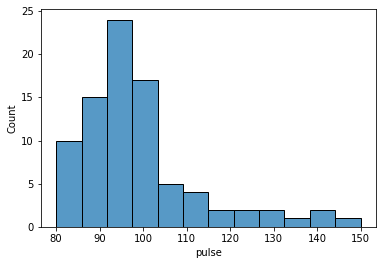

In [48]:
sns.histplot(data=df,x='pulse')

In [49]:
df['pulse'].skew()

1.6277710027057837

So,our data is not as much skewed but it is not normal also. So we should normalize it.

<AxesSubplot:xlabel='Count', ylabel='pulse'>

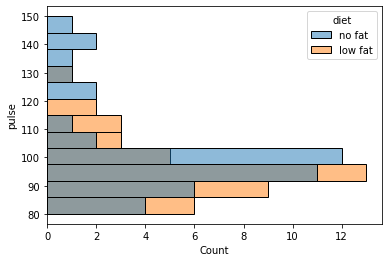

In [50]:
sns.histplot(data=df,y='pulse',hue='diet')

We can see from the above graph that people having **(no fat)** in their diet having less pulse rate as compared to people
having low fat in their diet.
- no fat =less pulse rate
- low fat=high pulse rate

<AxesSubplot:xlabel='kind', ylabel='pulse'>

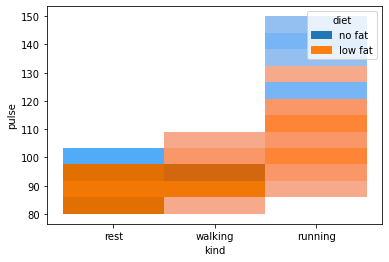

In [51]:
sns.histplot(data=df,y='pulse',x='kind',hue='diet')

## 1st Assumption:
We can analyze d/f kinds of people as well
- In rest = Low pulse rate (80-100)
- In walking = Mid pulse rate (80-110)
- In running= High pulse rate (85 -150 )

## 2nd Assumption:
- People in rest or walking position have much fat in their diet so they could be unhealthy .
- While people in running positon having zero fats in their diet are much healthy and active.
  

## **Analyzing Categorical Value:**

In [52]:
df.head()

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest


<AxesSubplot:xlabel='kind', ylabel='pulse'>

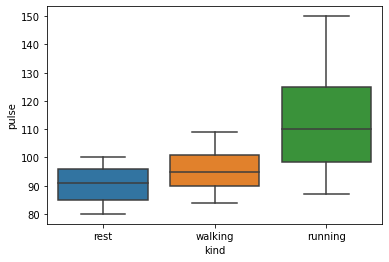

In [53]:
sns.boxplot(data=df,y='pulse',x='kind')

<AxesSubplot:xlabel='time', ylabel='pulse'>

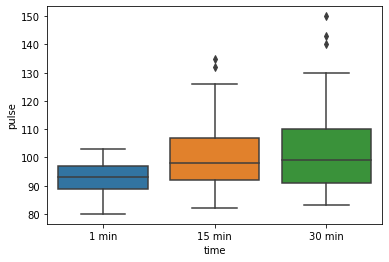

In [54]:
sns.boxplot(data=df,y='pulse',x='time')

Not to much outliers.

<AxesSubplot:xlabel='diet', ylabel='pulse'>

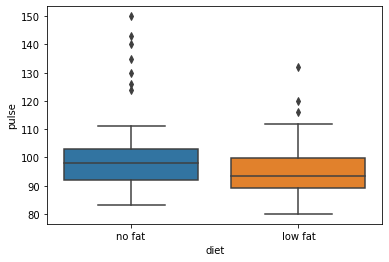

In [55]:
sns.boxplot(data=df,y='pulse',x='diet')

So,in our data diet column has outliers but these could be the pulses so we i think can't skip them.

<AxesSubplot:xlabel='time', ylabel='pulse'>

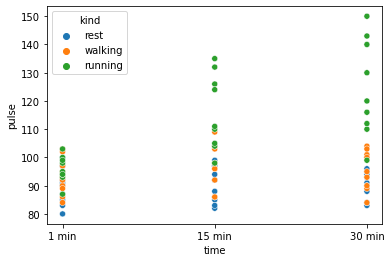

In [56]:
sns.scatterplot(data=df,x='time',y='pulse',hue='kind')

We can assume that
- During running of 30min pulse rate is very high as compared to other times.

<AxesSubplot:xlabel='time', ylabel='pulse'>

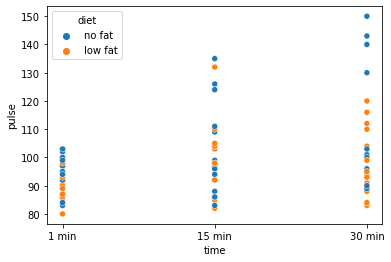

In [57]:
sns.scatterplot(data=df,x='time',y='pulse',hue='diet')

We can assume from the above graph
-  People with healthy/not fatty diet can run more(approx 30min) than with fatty diets.

<AxesSubplot:xlabel='kind', ylabel='pulse'>

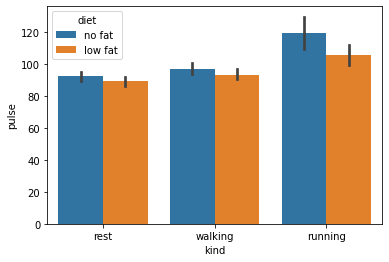

In [58]:
sns.barplot(data=df,x='kind',y='pulse',hue='diet')

Obviously,people with less fatty diets having less chances of heart attack as compared to people having fatty diets.
- Because in the above graph we can see no fatty diet people have good pulse as compared to others.